In [1]:
from numpy import *
from matplotlib import *
from pylab import *
from scipy import *
from numpy import*
import csv
import xlrd
import matplotlib.pyplot as plt

rc('text',usetex = True)
rc('font', family='serif')

from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import curve_fit

In [2]:
workbook = xlrd.open_workbook('Input_val.xlsx')
D_worksheet = workbook.sheet_by_name('Data_2')

In [3]:
workbook = xlrd.open_workbook('Input_val.xlsx')
D_worksheet = workbook.sheet_by_name('Data_2')
t = array(D_worksheet.col_values(0))
mf = array(D_worksheet.col_values(1))
pu = array(D_worksheet.col_values(2))
pd = array(D_worksheet.col_values(3))

In [4]:
f_aq = (len(t)-1)/(t[len(t)-1] - t[0])
f = 0.5
T = 1/f
N = np.int(np.floor((t[len(t)-1] - t[0])/T))
N_c = np.int(np.floor((len(t)-1)/N))

In [5]:
Pressure = np.zeros([N,N_c])
A = []
for j in range(len(pd)):
    if pd[j] < 1.05 and pd[j+1]-pd[j]>0.15:
        A.append(j)

In [6]:
Pressure_op =  [[] for i in range(len(A))]
Time_op =  [[] for i in range(len(A))]

Pressure_cl =  [[] for i in range(len(A))]
Time_cl =  [[] for i in range(len(A))]



for i in range(len(A)-1):
    Pressure_op[i].append(pd[A[i]:A[i]+38]-1)
    Time_op[i].append(t[A[i]:A[i]+38]-t[A[i]])
    
    Pressure_cl[i].append(pd[A[i]+38:A[i+1]]-1)
    Time_cl[i].append(t[A[i]+38:A[i+1]]-t[A[i]]-0.5)

In [7]:
I = np.ones(100)
I[0:25] = 3 
t = np.arange(0,2.0,0.02)

In [8]:
time = np.arange(0,0.5,0.01)
time_cl = np.arange(0.5,2,0.01)

In [9]:
import xlsxwriter

workbook = xlsxwriter.Workbook('Valve_Results.xlsx')
Data = workbook.add_worksheet('Data')

for i in range(len(A)-1):
    for j in range(len(Pressure_op[i][0])):
        Data.write(j,i,Pressure_op[i][0][j])

Data = workbook.add_worksheet('Data_Close')

for i in range(len(A)-1):
    for j in range(len(Pressure_cl[i][0])):
        Data.write(j,i,Pressure_cl[i][0][j])
workbook.close()

In [10]:
workbook = xlrd.open_workbook('Valve_Results_Mean.xlsx')
Mean_worksheet = workbook.sheet_by_name('Data')
P_mean_op = array(Mean_worksheet.col_values(0))

In [11]:
workbook = xlrd.open_workbook('Valve_Results_Mean.xlsx')
Mean_worksheet = workbook.sheet_by_name('Data_Close')
P_mean_cl = array(Mean_worksheet.col_values(0))

In [12]:
plt.plot(Time_op[0][0],Pressure_op[0][0])
plt.plot(Time_cl[0][0],Pressure_cl[0][0])

In [13]:
P_mean_op

array([0.03779661, 0.27077966, 0.56367797, 0.81681356, 1.03922034,
       1.22610169, 1.38157627, 1.50850847, 1.60937288, 1.68957627,
       1.75545763, 1.8100339 , 1.85430508, 1.88840678, 1.91620339,
       1.93684746, 1.95359322, 1.9670339 , 1.9780678 , 1.98623729,
       1.993     , 1.99754237, 2.00062712, 2.00342373, 2.0059661 ,
       2.00705085, 2.00681356, 2.00654237, 2.00733898, 2.00671186,
       2.00715254, 2.00730508, 2.00691525, 2.00657627, 2.0060339 ,
       2.00598305, 2.0060678 , 2.00669492])

In [14]:
lim_op = 0
i = 0
while P_mean_op[i]/np.max(P_mean_op) < 0.999:
    i = i+1
lim_op = i

lim_cl = 0

i = 0
while float(P_mean_cl[i])/np.max(P_mean_op) > 1:
    i = i+1

lim_cl = i

while float(P_mean_cl[i])/np.min(P_mean_op) > 1.001:
    i = i+1

lim_cl_f = i

lim_op,lim_cl,lim_cl_f

(24, 0, 41)

In [15]:
Time_cl[0][0][lim_cl_f],Time_op[0][0][lim_op],

(0.5539999999999998, 0.31899999999999995)

In [16]:
def Open(X,a,b,c): 
    t = X
    return(a*(1-b*np.exp(c*t)))

In [17]:
def Close(X,a,b,c,d): 
    t = X

    return((a*b+c*t**d)/(b+t**d))

In [18]:
DM = curve_fit(Open,(Time_op[i][0][0:lim_op]),P_mean_op[0:lim_op]/(P_mean_op[lim_op]-P_mean_op[0]),maxfev = 10000000)
DM[0]

array([  1.04500305,   1.02215435, -14.04529152])

In [19]:
DM[0] = ([  1.04500305,   1.02215435, -14.04529138])

TypeError: 'tuple' object does not support item assignment

In [20]:
CM = curve_fit(Close,(Time_cl[i][0][lim_cl:lim_cl_f]),P_mean_cl[lim_cl:lim_cl_f]/(P_mean_cl[lim_cl]-P_mean_cl[lim_cl_f]),maxfev = 100000000)
CM[0]

array([1.00440339e+00, 2.81228111e-05, 2.73669334e-02, 7.07883594e+00])

In [21]:
DM[0] = ([  1.04500305,   1.02215435, -14.04529138])
CM[0] = ([1.00440331e+00, 2.81222682e-05, 2.73671364e-02, 7.07884854e+00])

TypeError: 'tuple' object does not support item assignment

In [22]:
Time_cl[i][0][lim_cl:lim_cl_f]

array([0.007, 0.019, 0.033, 0.047, 0.059, 0.073, 0.087, 0.099, 0.113,
       0.127, 0.139, 0.154, 0.166, 0.18 , 0.193, 0.207, 0.219, 0.233,
       0.247, 0.259, 0.273, 0.287, 0.299, 0.313, 0.327, 0.339, 0.354,
       0.366, 0.38 , 0.393, 0.407, 0.419, 0.433, 0.447, 0.459, 0.473,
       0.487, 0.499, 0.514, 0.526, 0.54 ])

In [23]:
for i in range(len(A)-1):
    for j in range(len(Pressure_cl[i][0])):
        Data.write(j,i,Pressure_cl[i][0][j])
workbook.close()

AttributeError: 'Book' object has no attribute 'close'

In [24]:
len(P_mean_cl)

112

In [26]:
#for i in range(len(A)-1):
    #plt.plot(Time_op[i][0],Pressure_op[i][0],'x')
plt.plot(Time_op[i][0][0:lim_op],P_mean_op[0:lim_op],'o')
plt.plot(Time_op[i][0][0:lim_op],(P_mean_op[lim_op]-P_mean_op[0])*Open((Time_op[i][0][0:lim_op]),DM[0][0],DM[0][1],DM[0][2]),'k--')
    #plt.plot(Time_cl[i][0],Pressure_cl[i][0])
#plt.plot(t,I,'k--')

In [28]:
P_mean_op[lim_op]/Open((Time_op[i][0][lim_op]),DM[0][0],DM[0][1],DM[0][2])/2

0.9708748564259677

In [29]:
Close((Time_cl[i][0][lim_cl:lim_cl_f]),CM[0][0],CM[0][1],CM[0][2],CM[0][3])

array([1.00440339, 1.00440336, 1.00440199, 1.00439151, 1.00432549,
       1.00405969, 1.00340821, 1.0015145 , 0.99756898, 0.98891923,
       0.9724958 , 0.9489365 , 0.90610668, 0.84307697, 0.76578294,
       0.68124439, 0.5740668 , 0.46782767, 0.38451207, 0.30118252,
       0.23424344, 0.1890611 , 0.14840074, 0.11810531, 0.09848813,
       0.08118722, 0.06837594, 0.06004391, 0.05261579, 0.04702577,
       0.04332562, 0.03996459, 0.03738181, 0.03563832, 0.03402399,
       0.03283879, 0.03188763, 0.03106746, 0.03041243, 0.02995463,
       0.02951651])

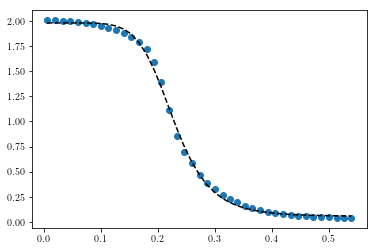

In [30]:
#for i in range(len(A)-1):
    #plt.plot(Time_cl[i][0],Pressure_cl[i][0],'x')
plt.plot(Time_cl[i][0][lim_cl:lim_cl_f],P_mean_cl[lim_cl:lim_cl_f],'o')
plt.plot(Time_cl[i][0][lim_cl:lim_cl_f],(P_mean_cl[lim_cl]-P_mean_cl[lim_cl_f])*Close((Time_cl[i][0][lim_cl:lim_cl_f]),CM[0][0],CM[0][1],CM[0][2],CM[0][3]),'k--')
    #plt.plot(Time_cl[i][0],Pressure_cl[i][0])
#plt.plot(t,I,'k--')

In [33]:
def Open(X,a,b,c): 
    t = X
    return(a*(1-b*np.exp(c*t)))

def Close(X,a,b,c,d): 
    t = X
    return((a*b+c*t**d)/(b+t**d))

Ope = ([  1.04500305,   1.02215435, -14.04529138])
Clo = ([1.00440331e+00, 2.81222682e-05, 2.73671364e-02, 7.07884854e+00])


def Perfil(f_v,DC,Esc):
    
    Tau = 1/f_v
    Tau_on = T*DC
    
    t_on = np.arange(0,Tau_on,Tau/101)
    t_off = np.arange(0,Tau-Tau_on,Tau/101)
    
    
    Pres = np.zeros(len(t_on)+len(t_off))
    
    for i in range(len(t_on)):
        if t_on[i] < 0.19:
            Pres[i] = Esc*Open((t_on[i]),Ope[0],Ope[1],Ope[2])
        else:
            Pres[i] = Pres[i-1]
    A = i
    
    for i in range(0,len(t_off)):
        if t_off[i] < 0.52:
            Pres[i+A] = Pres[A]*Close((t_off[i]),Clo[0],Clo[1],Clo[2],Clo[3])/1.00440331
        else:
            Pres[i+A] = 0*Pres[i+A-1]
    Pres[len(Pres)-1] = Pres[len(Pres)-2]
    
    return (Pres)

In [34]:
DC = np.arange(0.05,0.12,0.01)
for i in range(len(DC)):
    Pres = Perfil(0.5,DC[i],1)
    print(len(Pres))

102
102
102
102
102
102
102


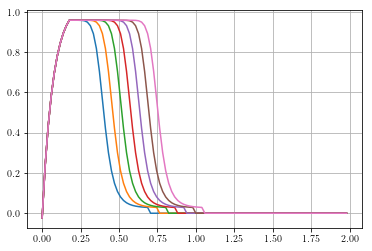

In [35]:
f_v = 0.5
t = np.arange(0,1/f_v,1/f_v/102)
DC = np.arange(0.09,0.30,0.03)
for i in range(len(DC)):
    Pres = Perfil(f_v,DC[i],1)
    plt.plot(t,Pres)
plt.grid()

In [370]:
j=0
while Pres[j+1]-Pres[j]>0.1 or Pres[j]>0.05:
    j=j+1
print(t[j],1/(4*t[j]))

0.9215686274509803 0.2712765957446809


In [42]:
t = np.arange(0,2,2/100)

In [43]:
plt.plot(t,A)

ValueError: x and y must have same first dimension, but have shapes (100,) and (60,)

In [231]:
j=0
while Pres[j+1]-Pres[j]>0.1 or Pres[j]>1.1:
    j=j+1
print(j)

4


In [232]:
j

4

In [229]:
f = []
DC = np.arange(0.05,0.45,0.1)
for i in range(len(DC)):
    [A] = Perfil(0.5,DC[i],1)
    print(B,1/(B/0.4))
    f.append(1/(B/0.4))
    plt.plot(A,'--',label = 'FE = ' + str(np.round(DC[i],2)))
plt.grid()
plt.legend()
#plt.ylim(1,1.2)

ValueError: too many values to unpack (expected 1)

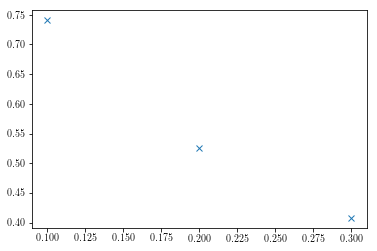

In [294]:
plt.plot(DC,f,'x')

In [140]:
erro = np.zeros([len(A),len(Pressure_op[i][0])])
erro_cl = np.zeros([len(A),len(Pressure_cl[i][0])])
for i in range(len(A)-1):
    for j in range(len(Pressure_op[i][0])):
        erro[i][j] = abs(Pressure_op[i][0][j] - Open((Time_op[i][0][j]),DM[0][0],DM[0][1],DM[0][2],DM[0][3],DM[0][4]))/Pressure_op[i][0][j]*100
    for j in range(len(Pressure_cl[i][0])):
        erro_cl[i][j] = abs(Pressure_cl[i][0][j] - Close((Time_cl[i][0][j]),CM[0][0],CM[0][1],CM[0][2],CM[0][3],CM[0][4],CM[0][5],CM[0][6]))/Pressure_cl[i][0][j]*100

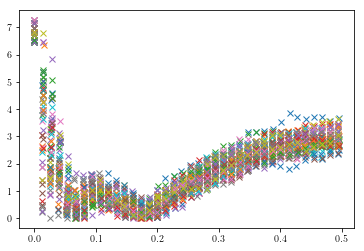

In [564]:
for i in range(len(A)-1):
    plt.plot(Time_op[i][0],erro[i],'x')

In [565]:
for i in range(len(A)-1):
    plt.plot(Time_cl[i][0],erro_cl[i],'x')
plt.xlim(0.4,1)
plt.ylim(0,50)

(0, 50)

In [566]:
for i in range(np.int(N)-1):
    plt.plot(t[A:N_c+A],pd[N_c*i+A:N_c*(i+1)+A])

TypeError: unsupported operand type(s) for +: 'int' and 'list'

In [567]:
for i in range(np.int(N)-1):
    plt.plot(t[A:N_c+A],mf[N_c*i+A:N_c*(i+1)+A])

TypeError: unsupported operand type(s) for +: 'int' and 'list'

In [27]:
i = 0
plt.plot(t[i:4574],pd[i:4574])

75.0